 # Womens E-Commerce Clothing Reviews

Hi there! In this exercise, we will first go through the dataset - explorate the data and gain insights. The next task will be sentiment analysis with LSTM. It will be a simple binary classification, whether the customer review is positive(recommend) or negative(not recommend). The final task will be a recommendation system. 

Let's start! 

# Data Explanation

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

- Age: Positive Integer variable of the reviewers age.

- Title: String variable for the title of the review.

- Review Text: String variable for the review body.

- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

- Division Name: Categorical name of the product high level division.

- Department Name: Categorical name of the product department name.

- Class Name: Categorical name of the product class name.

In [147]:
! pwd

/content/drive/MyDrive/딥러닝


In [148]:
%cd './drive/MyDrive/딥러닝'

[Errno 2] No such file or directory: './drive/MyDrive/딥러닝'
/content/drive/MyDrive/딥러닝


# Data Upload

In [346]:
import pandas as pd 

df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0 )

In [347]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                   Review Text  \
0                                                                                                                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly ...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was com...   
3                                                                                                                                                                                 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                             This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [152]:
for dtype, cols in df.groupby(by=df.dtypes, axis=1):
  print(dtype)
  for col in list(cols):
    print(f'unique value of column "{col}" : ', df[col].nunique())
  print('---')

int64
unique value of column "Clothing ID" :  1206
unique value of column "Age" :  77
unique value of column "Rating" :  5
unique value of column "Recommended IND" :  2
unique value of column "Positive Feedback Count" :  82
---
object
unique value of column "Title" :  13993
unique value of column "Review Text" :  22634
unique value of column "Division Name" :  3
unique value of column "Department Name" :  6
unique value of column "Class Name" :  20
---


# Top 20 recommended Item 

In [232]:
top20_df = pd.pivot_table(df, 
                 index= ['Clothing ID','Class Name' ],
                 columns= 'Recommended IND'  ,
                 values=  'Title'   ,
                 aggfunc=  'count'   ).sort_values(by=[1],ascending=False)[:20]

top20_df['ratio'] = round(top20_df[1]/(top20_df[0]+top20_df[1])*100,2)
top20_df

Recommended IND             0      1  ratio
Clothing ID Class Name                     
1078        Dresses     164.0  707.0  81.17
862         Knits       124.0  534.0  81.16
1094        Dresses     118.0  533.0  81.87
1081        Dresses      72.0  415.0  85.22
872         Knits        64.0  386.0  85.78
829         Blouses      79.0  373.0  82.52
1110        Dresses      74.0  345.0  82.34
895         Fine gauge   56.0  280.0  83.33
868         Knits        96.0  274.0  74.05
850         Blouses      38.0  242.0  86.43
936         Sweaters     52.0  237.0  82.01
867         Knits        56.0  235.0  80.76
1095        Dresses      62.0  225.0  78.40
863         Knits        40.0  203.0  83.54
1059        Pants        46.0  201.0  81.38
1080        Dresses      41.0  200.0  82.99
1077        Dresses      52.0  199.0  79.28
1086        Dresses      43.0  198.0  82.16
860         Knits        51.0  186.0  78.48
1083        Dresses      34.0  180.0  84.11

These are the top 20 recommended items. Most of the recommended items are dresses! It seems that this website sell many different kinds of dresses.

# String features

In [153]:
for col in df.select_dtypes('object').columns:
  print(col,' : ' ,df[col].unique(),'\n')

Title  :  [nan 'Some major design flaws' 'My favorite buy!' ...
 'Cute, but see through'
 'Very cute dress, perfect for summer parties and we'
 'Please make more like this one!'] 

Review Text  :  ['Absolutely wonderful - silky and sexy and comfortable'
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major desi


Let's look at some bar charts to gain insights regarding recommendations and ratings.

### Bar chart - Recommended IND

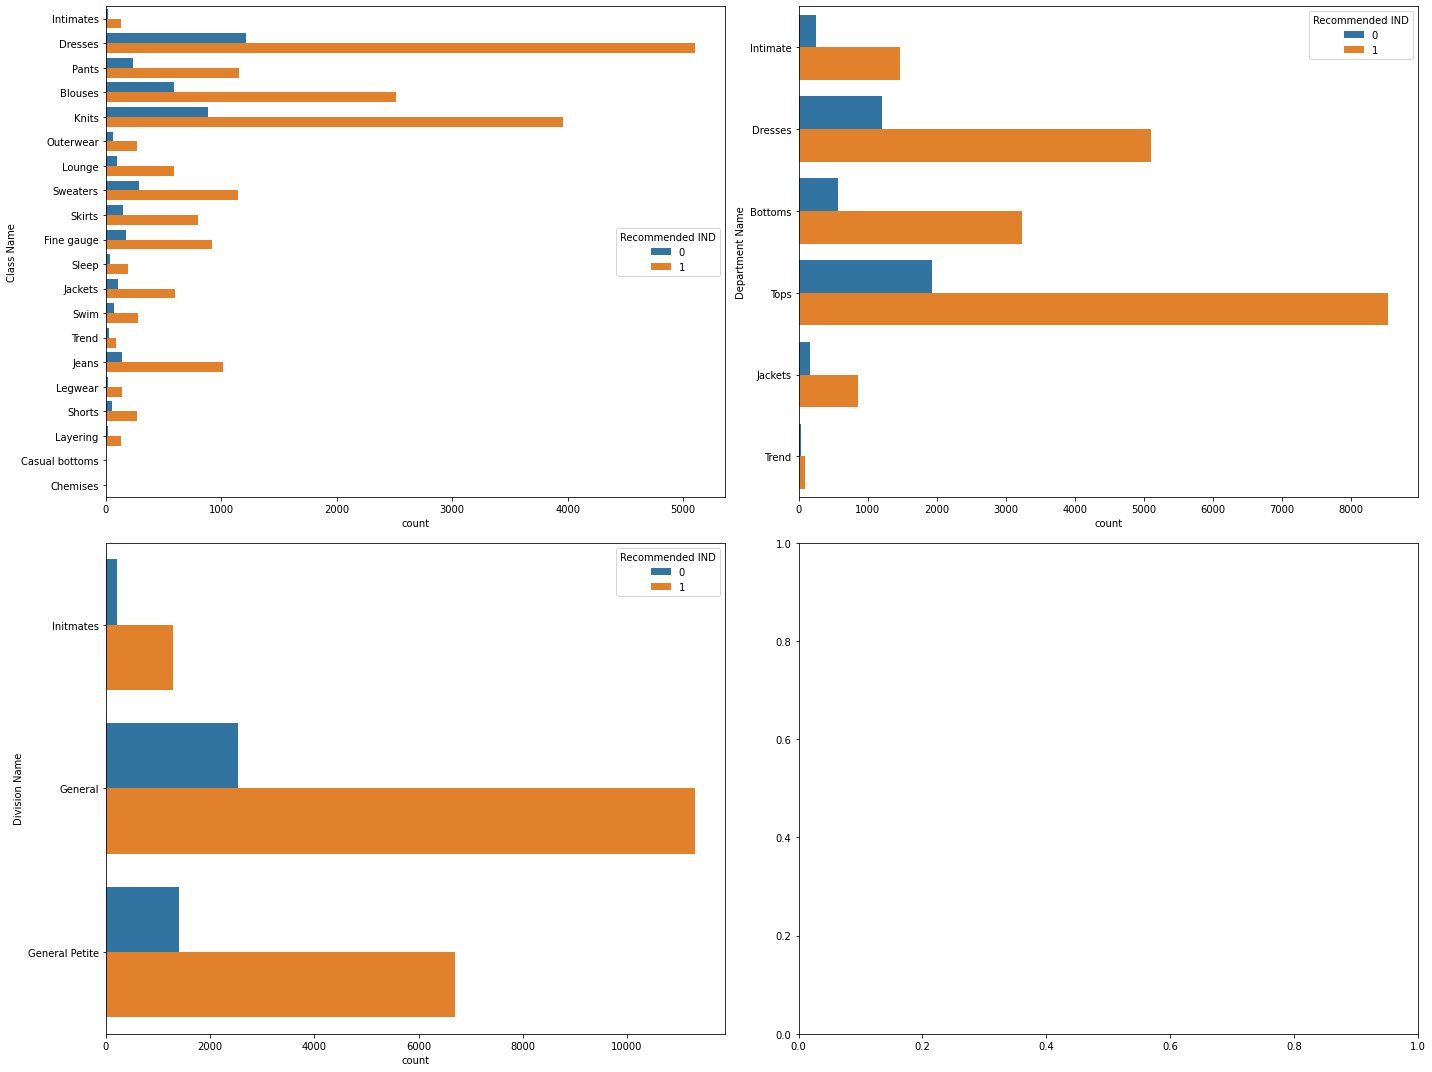

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, df[['Class Name','Department Name','Division Name']]):
    sns.countplot(y=col, hue='Recommended IND', data=df, ax=ax)
plt.tight_layout()
plt.show()

### Bar chart - Rating

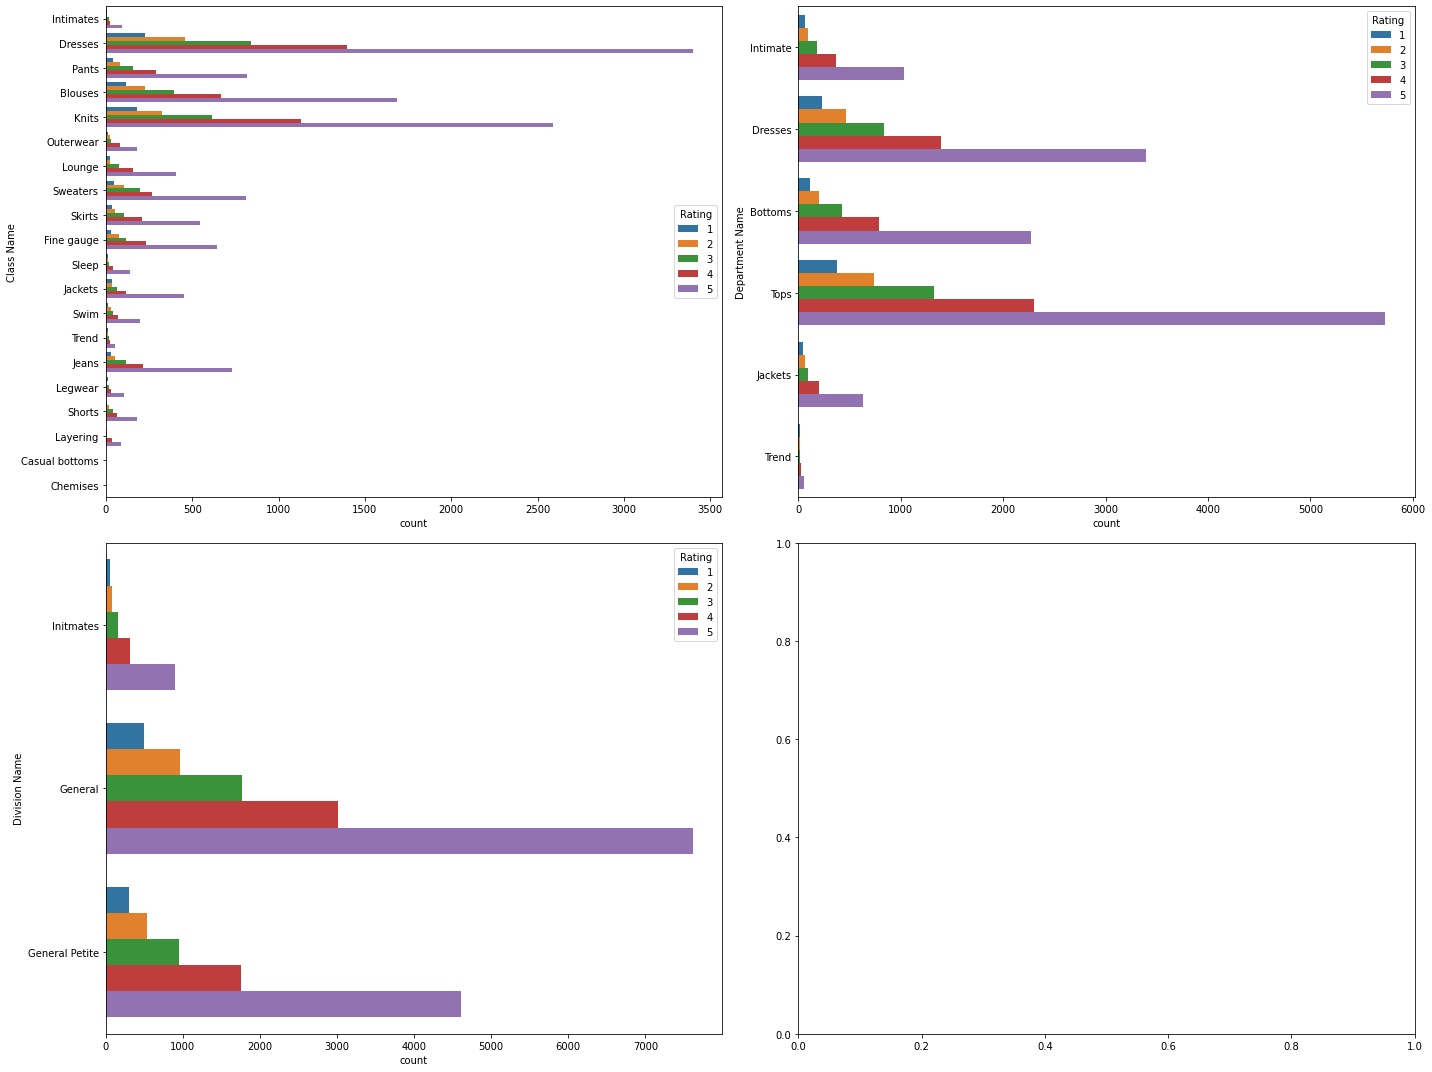

In [197]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, df[['Class Name','Department Name','Division Name']]):
    sns.countplot(y=col, hue='Rating', data=df, ax=ax)
plt.tight_layout()
plt.show()

### Average number of words

In [212]:
df["Review Text"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).mean()

11.456342824256588

In [213]:
df["Title"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).mean()

2.8381057337403672

### Max number of words 

In [214]:
df["Review Text"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).max()

103.0

In [215]:
df["Title"].astype('str').apply(lambda x: len(x.split())/len(x.split('.'))).max()

12.0

## Rating

In [154]:
cnts = list(df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count())

In [155]:
x_val = df.Rating.unique()
x_val.sort()

x_values = list()
for i,x in enumerate(x_val):
  x1 = str(x)+'_0'
  x_values.append(x1)
  x2 = str(x)+'_1'
  x_values.append(x2)

[Text(0, 15, '826'),
 Text(0, 15, '16'),
 Text(0, 15, '1471'),
 Text(0, 15, '94'),
 Text(0, 15, '1682'),
 Text(0, 15, '1189'),
 Text(0, 15, '168'),
 Text(0, 15, '4909'),
 Text(0, 15, '25'),
 Text(0, 15, '13106')]

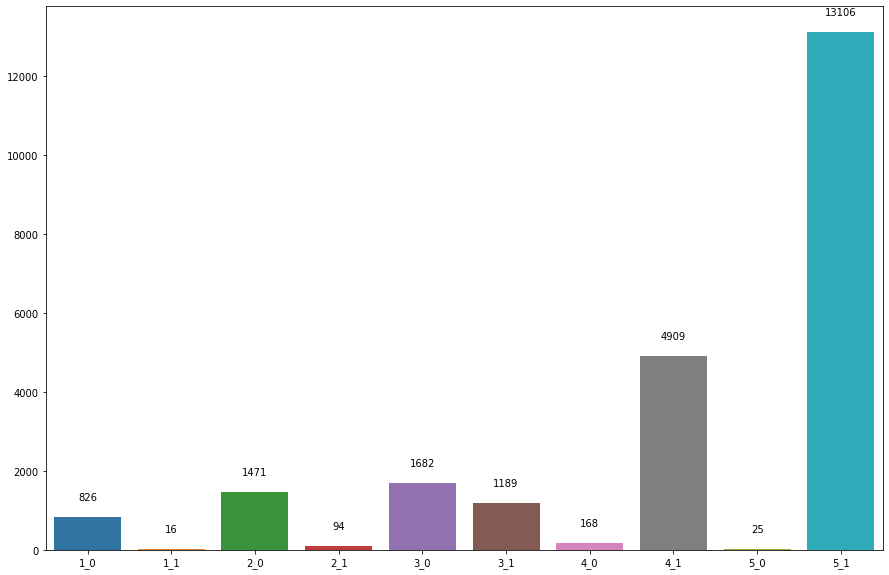

In [156]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
barchart = sns.barplot(x=x_values, y=cnts, ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15)

In [159]:
for i in range(1,6):
  print('Sample review for the rating: ', i)
  print(list(df[df['Rating']==i]['Review Text'])[0])
  print('')

Sample review for the rating:  1
3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!

Sample review for the rating:  2
I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just di

## Wordcloud

### Review Text

In [164]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

ratings_adj = list()

for i in range(1,6):

  for j in range(2):
    count_words = dict()
    for review in df[(df['Rating']==i)&(df['Recommended IND']==j)]['Review Text']:
      review = nltk.word_tokenize(str(review))
      pos_tagged = nltk.pos_tag(review)
      words = filter(lambda x:x[1] in ('JJ','JJR','JJS') ,pos_tagged)
      for word in words:
        word = word[0]
        if word in count_words:
          count_words[word]+=1
        else:
          count_words[word] = 1

    ratings_adj.append(count_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


---- 1 & 0 ----
---- 1 & 1 ----
---- 2 & 0 ----
---- 2 & 1 ----
---- 3 & 0 ----
---- 3 & 1 ----
---- 4 & 0 ----
---- 4 & 1 ----
---- 5 & 0 ----
---- 5 & 1 ----


In [182]:
df[df['Review Text'].str.contains('little',na=False)]['Review Text'][:10]

1     Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly ...
6     I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and ...
8                                                                                                                                          I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.
20    If this product was in petite, i would get the petite. the regular is a litt

Wordcloud for the Rating and Recommended IND:  1_0


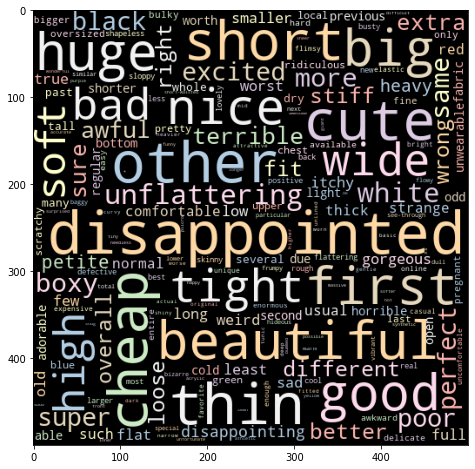

Wordcloud for the Rating and Recommended IND:  1_1


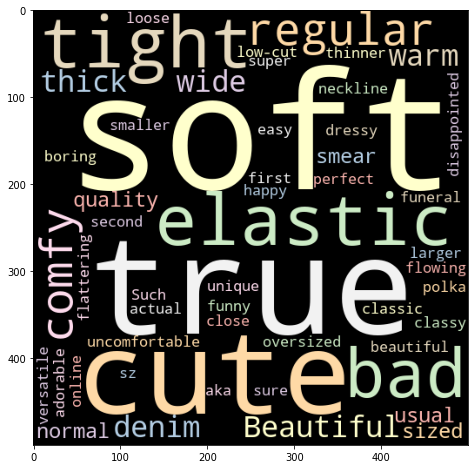

Wordcloud for the Rating and Recommended IND:  2_0


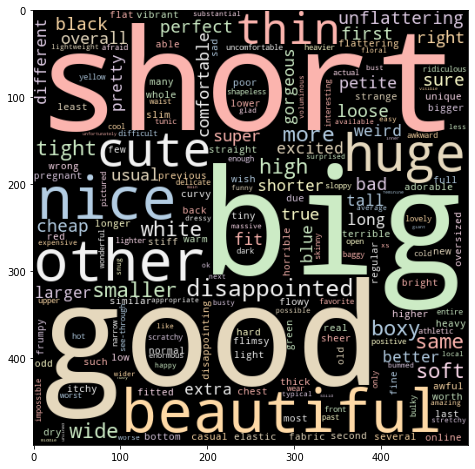

Wordcloud for the Rating and Recommended IND:  2_1


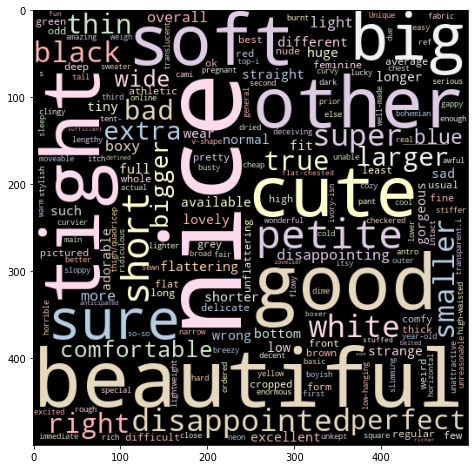

Wordcloud for the Rating and Recommended IND:  3_0


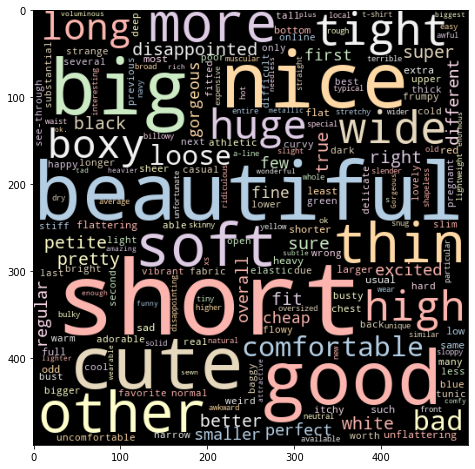

Wordcloud for the Rating and Recommended IND:  3_1


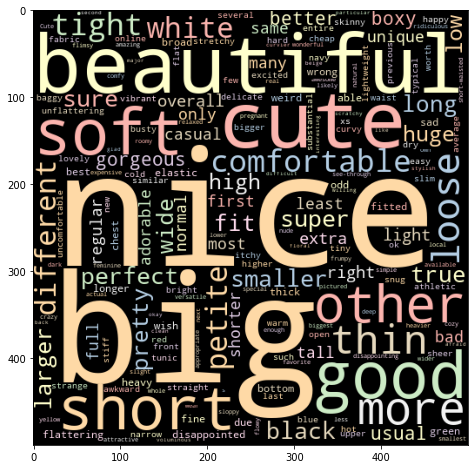

Wordcloud for the Rating and Recommended IND:  4_0


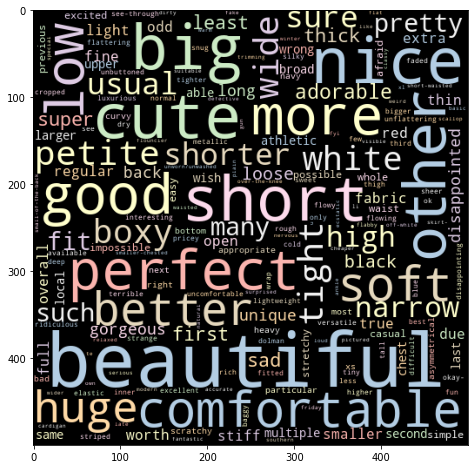

Wordcloud for the Rating and Recommended IND:  4_1


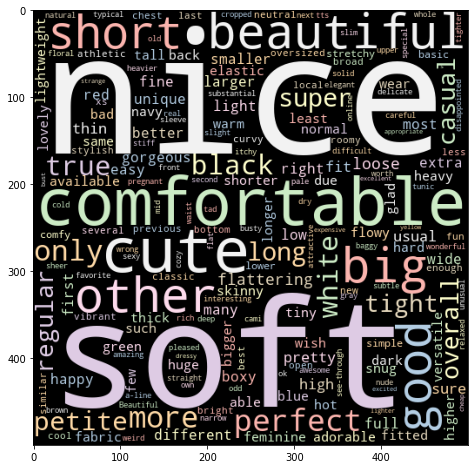

Wordcloud for the Rating and Recommended IND:  5_0


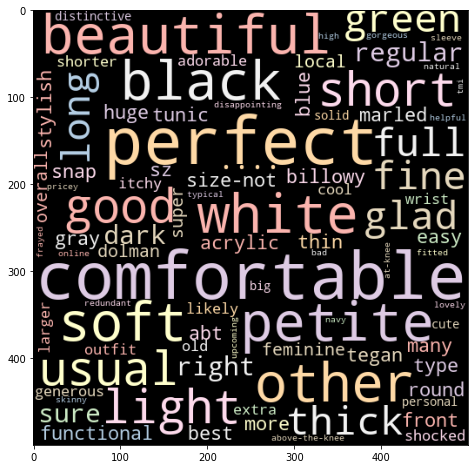

Wordcloud for the Rating and Recommended IND:  5_1


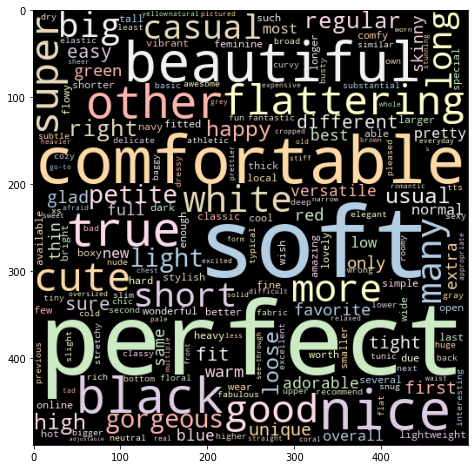

In [180]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, dicty in enumerate(ratings_adj):
   print('Wordcloud for the Rating and Recommended IND: ', x_values[idx])
   dicty.pop('i', None)
   dicty.pop('top', None)
   dicty.pop('much', None)
   dicty.pop('little', None)
   wordcloud = WordCloud(width = 500, 
                         height = 500,
                         colormap="Pastel1").generate_from_frequencies(dicty)

   plt.figure(figsize=(10,8))
   plt.imshow(wordcloud)
   plt.show()

### Title

In [199]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

ratings_adj = list()

for i in range(1,6):

  for j in range(2):
    count_words = dict()
    print('----',i,'&',j,'----')
    for review in df[(df['Rating']==i)&(df['Recommended IND']==j)]['Title']:
      review = nltk.word_tokenize(str(review))
      pos_tagged = nltk.pos_tag(review)
      words = filter(lambda x:x[1] in ('JJ','JJR','JJS') ,pos_tagged)
      for word in words:
        word = word[0]
        if word in count_words:
          count_words[word]+=1
        else:
          count_words[word] = 1

    ratings_adj.append(count_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


---- 1 & 0 ----
---- 1 & 1 ----
---- 2 & 0 ----
---- 2 & 1 ----
---- 3 & 0 ----
---- 3 & 1 ----
---- 4 & 0 ----
---- 4 & 1 ----
---- 5 & 0 ----
---- 5 & 1 ----


Wordcloud for the Rating and Recommended IND:  1_0


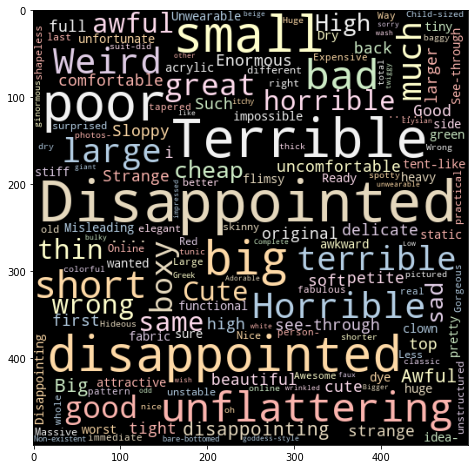

Wordcloud for the Rating and Recommended IND:  1_1


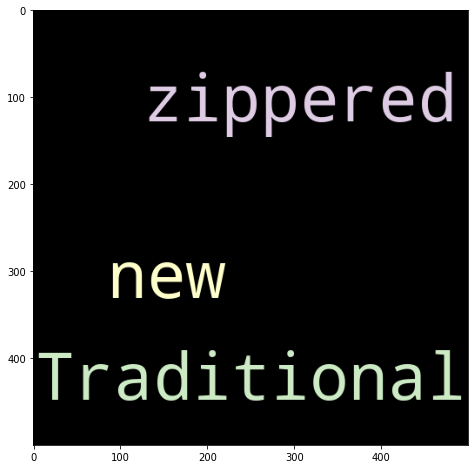

Wordcloud for the Rating and Recommended IND:  2_0


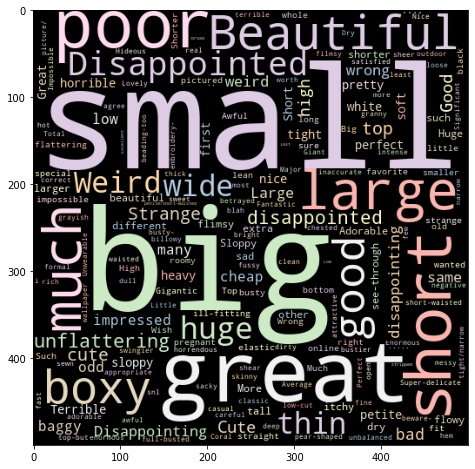

Wordcloud for the Rating and Recommended IND:  2_1


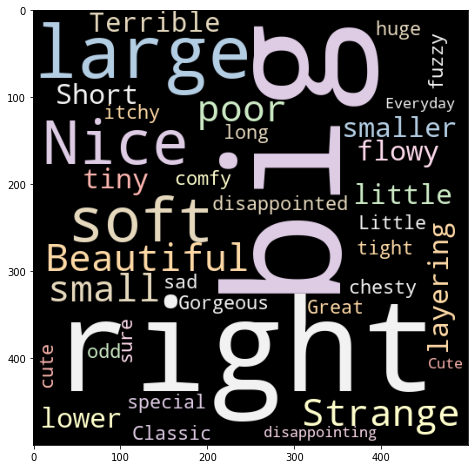

Wordcloud for the Rating and Recommended IND:  3_0


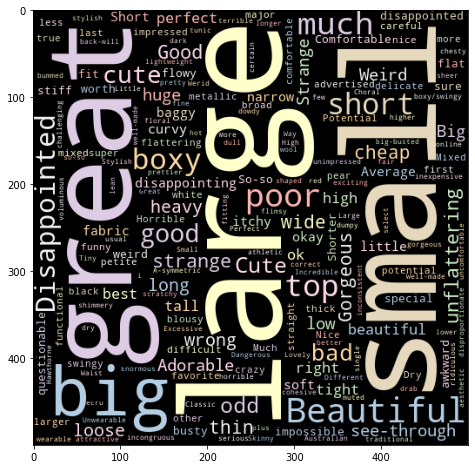

Wordcloud for the Rating and Recommended IND:  3_1


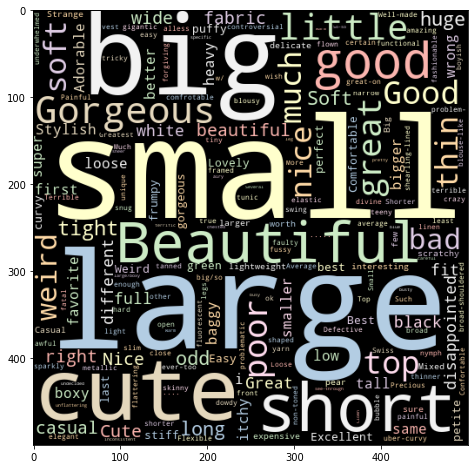

Wordcloud for the Rating and Recommended IND:  4_0


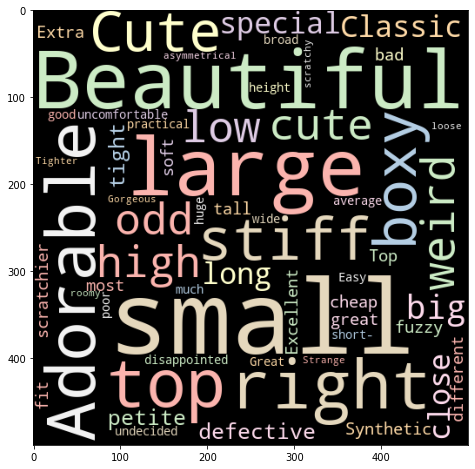

Wordcloud for the Rating and Recommended IND:  4_1


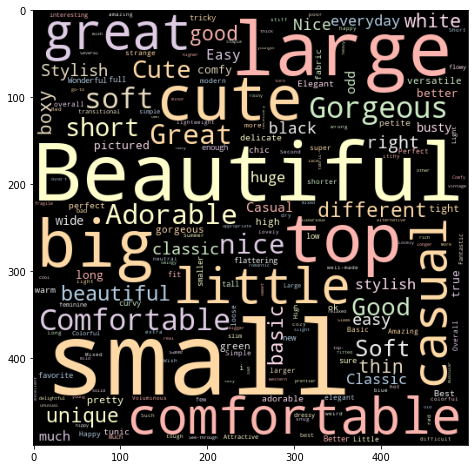

Wordcloud for the Rating and Recommended IND:  5_0


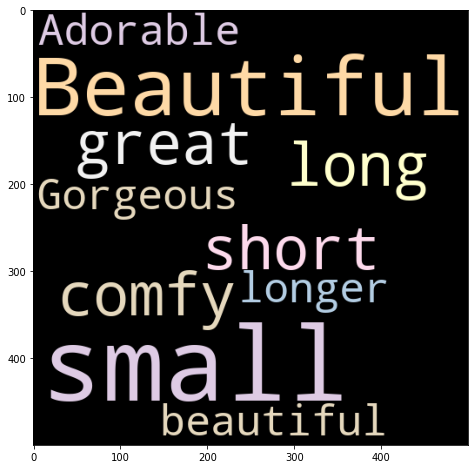

Wordcloud for the Rating and Recommended IND:  5_1


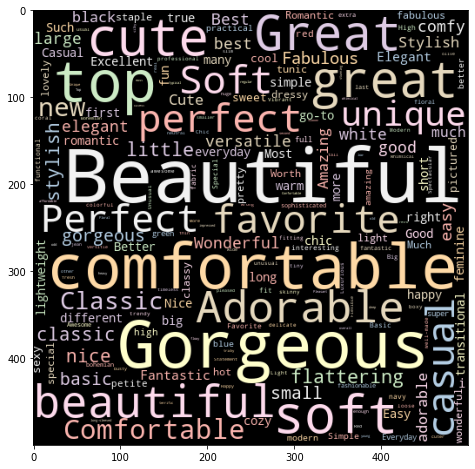

In [200]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, dicty in enumerate(ratings_adj):
   print('Wordcloud for the Rating and Recommended IND: ', x_values[idx])
   wordcloud = WordCloud(width = 500, 
                         height = 500,
                         colormap="Pastel1").generate_from_frequencies(dicty)

   plt.figure(figsize=(10,8))
   plt.imshow(wordcloud)
   plt.show()

# LSTM Setiment analysis

## Text Preprocessing

### Combination of Title and Review Text

In [348]:
# NLTK, for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [350]:
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')
df['Text'] = df['Title']+' '+ df['Review Text']

In [351]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                   Review Text  \
0                                                                                                                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly ...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was com...   
3                                                                                                                                                                                 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                             This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   

                                                                                                                                                                                                                                                                                                          Text  
0                                                                                                                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable  
1   Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly...  
2  Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overa...  
3                                    

In [352]:
import nltk
nltk.download('wordnet')

def preprocess(text):
    words = nltk.word_tokenize(str(text))
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word).lower() for word in words]
    pos_tagged = nltk.pos_tag(tokens)
    words = filter(lambda x:x[1] in ('ADV','NNP','VB','RB','NN','JJ','JJR','JJS') ,pos_tagged)
    
    text= ''
    for word in words:
        text += word[0]
        text += ' '

    return text

df['Text'] = df['Text'].apply(preprocess)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [353]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                            
1         1080   34                            
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                   Review Text  \
0                                                                                                                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly ...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was com...   
3                                                                                                                                                                                 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                             This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   

                                                                                                                                                                                                                                                                                                          Text  
0                                                                                                                                                                                                                                                                 absolutely wonderful silky sexy comfortable   
1                                                                                                                                                 love dress sooo pretty i find store i glad i bc i never have petite i petite i length me- hit just little knee definitely be true midi someone truly petite   
2  major design flaw i such high hope dress really work i initially petite small usual size i be outrageously small so small fact i not zip i petite medium just ok. overall top half wa comfortable fit nicely bottom half very tight layer several somewhat cheap net layer imo major design flaw net lay...  
3                                    

In [354]:
df.drop(df[df['Text'] == ''].index, inplace=True)
#df.drop(df[df['Text'].isna()].index, inplace=True)

In [355]:
len(df)

22642

### Train Test split

In [333]:
# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [397]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888) 

In [398]:
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

In [399]:
max_len

376

### Word Embedding with GloVe

In order to use text as input for a model, we need all the text data to have equal length. For this we have:  tensorflow.keras.preprocessing.sequence.pad_sequences. We take the max_len as the parameter, so that all of the texts will have the same length. This means, empty spaces will be filled with 0.

> OOV means 'out of vocabulary'


In [400]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

In [401]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

In [403]:
# https://nlp.stanford.edu/projects/glove/
GLOVE_FILE = './glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [404]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

How many missed words?  1310
As example:  ['<OOV>', 'pilcro', 'armhole', 'xsp', 'xxsp', 'tshirt', 'xsmall', 'bralette', 'culotte', 'cartonnier']


### LSTM Model

Find out what LSTM is: https://intellipaat.com/blog/what-is-lstm/

https://www.youtube.com/watch?v=LfnrRPFhkuY

In [405]:
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

In [407]:
# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout

# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

Epoch 1/60
124/124 [==============================] - 166s 1s/step - loss: 0.9239 - auc: 0.5102 - val_loss: 0.7380 - val_auc: 0.5680
Epoch 2/60
124/124 [==============================] - 170s 1s/step - loss: 0.7602 - auc: 0.5331 - val_loss: 0.6786 - val_auc: 0.7094
Epoch 3/60
124/124 [==============================] - 159s 1s/step - loss: 0.7096 - auc: 0.5760 - val_loss: 0.6240 - val_auc: 0.7698
Epoch 4/60
124/124 [==============================] - 158s 1s/step - loss: 0.6575 - auc: 0.6178 - val_loss: 0.5659 - val_auc: 0.7848
Epoch 5/60
124/124 [==============================] - 158s 1s/step - loss: 0.6129 - auc: 0.6337 - val_loss: 0.5245 - val_auc: 0.8082
Epoch 6/60
124/124 [==============================] - 158s 1s/step - loss: 0.5755 - auc: 0.6554 - val_loss: 0.5048 - val_auc: 0.8301
Epoch 7/60
124/124 [==============================] - 157s 1s/step - loss: 0.5572 - auc: 0.6572 - val_loss: 0.4739 - val_auc: 0.8359
Epoch 8/60
124/124 [==============================] - 157s 1s/step - 

In [408]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

213/213 [==============================] - 22s 104ms/step


In [409]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

496/496 [==============================] - 53s 106ms/step


In [411]:
import plotly.graph_objects as go

score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()